# Installing Libraries

In [51]:
%pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets

In [53]:
orders = pd.read_csv('orders.csv')
order_details = pd.read_csv('order_details.csv')
pizzas = pd.read_csv('pizzas.csv')
pizza_types = pd.read_csv('pizza_types.csv', encoding='latin1')

# Merge datasets

In [54]:
# Check & drop duplicate columns from order_details if they already exist
order_details = order_details.drop(columns=['price', 'size'], errors='ignore')

# Rename for consistency
pizzas.rename(columns={'pizza_type_id': 'pizza_type'}, inplace=True)
pizza_types.rename(columns={'pizza_type_id': 'pizza_type'}, inplace=True)

# Merge order_details with pizzas (on 'pizza_id')
order_details = order_details.merge(pizzas, on='pizza_id')

# Merge the result with pizza_types (on 'pizza_type')
order_details = order_details.merge(pizza_types, on='pizza_type')


# Top 10 Most Ordered Pizzas

C:\Users\Windows\AppData\Local\Temp\ipykernel_10072\1825338649.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pizzas.values, y=top_pizzas.index, palette='viridis')


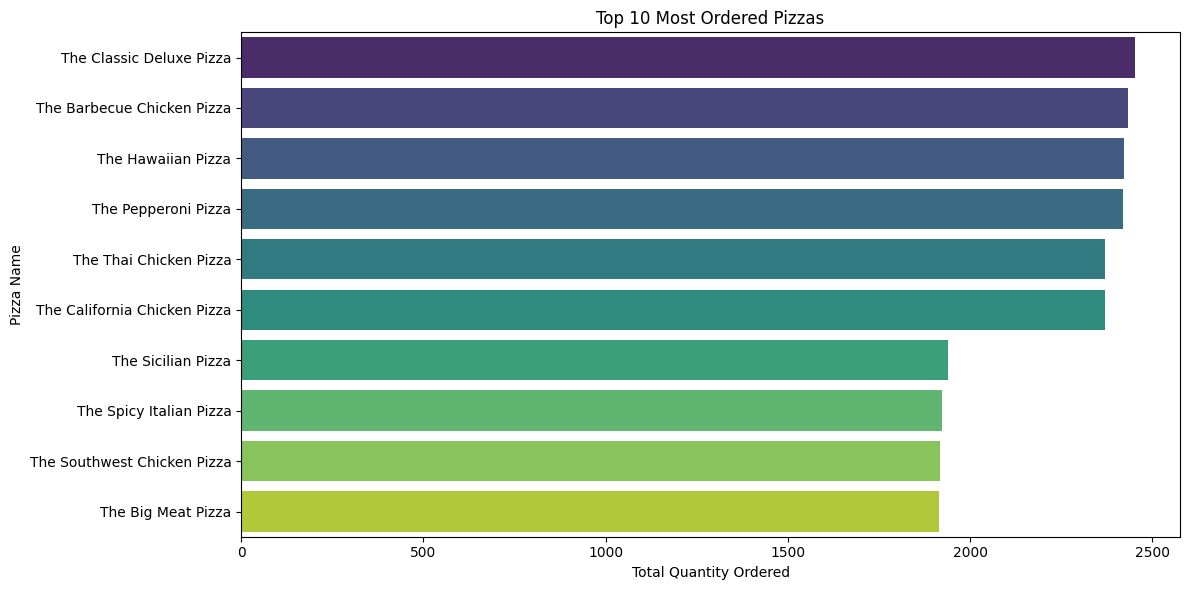

In [55]:
top_pizzas = order_details.groupby('name')['quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_pizzas.values, y=top_pizzas.index, palette='viridis')
plt.title('Top 10 Most Ordered Pizzas')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Pizza Name')
plt.tight_layout()
plt.show()

# Monthly Sales Trend

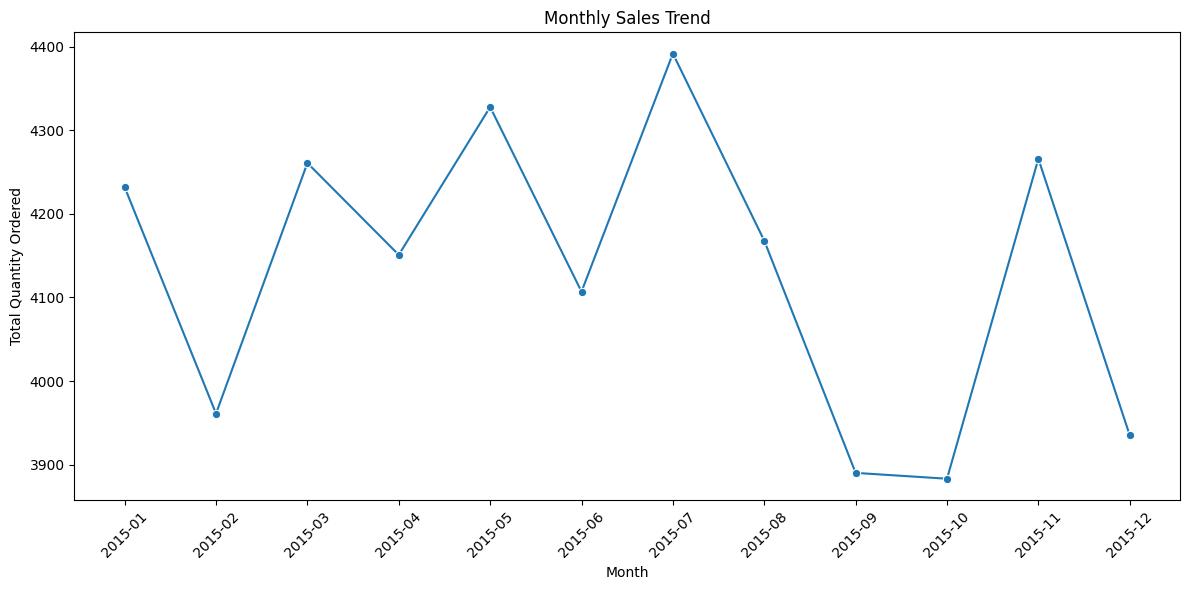

In [56]:
monthly_sales = order_details.merge(orders, on='order_id')

# ✅ Ensure 'date' is in datetime format after merge
monthly_sales['date'] = pd.to_datetime(monthly_sales['date'])

monthly_sales['month'] = monthly_sales['date'].dt.to_period('M')

monthly_trend = monthly_sales.groupby('month')['quantity'].sum()
monthly_trend.index = monthly_trend.index.astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Pizza Category-wise Sales

C:\Users\Windows\AppData\Local\Temp\ipykernel_10072\3235579439.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='magma')


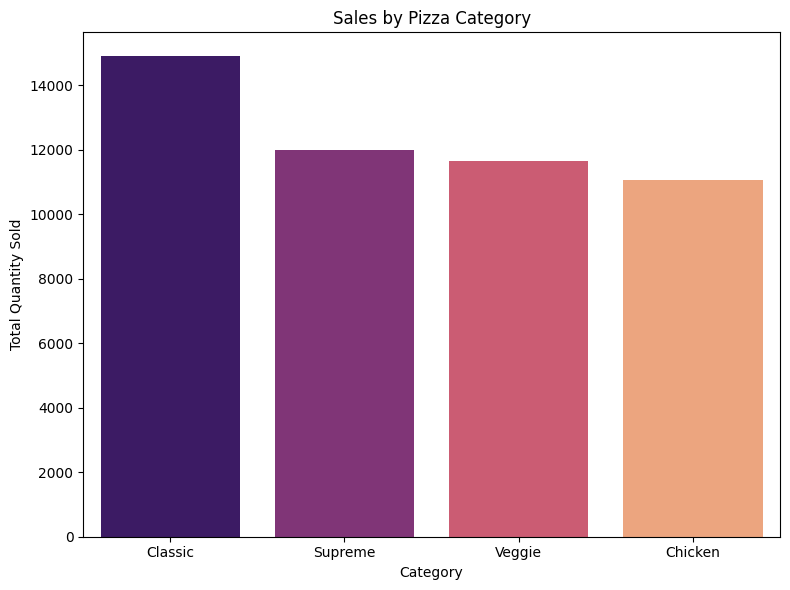

In [57]:
category_sales = order_details.groupby('category')['quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='magma')
plt.title('Sales by Pizza Category')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Category')
plt.tight_layout()
plt.show()


# Revenue by Pizza Type

C:\Users\Windows\AppData\Local\Temp\ipykernel_10072\1136139259.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_pizza.values, y=revenue_pizza.index, palette='coolwarm')


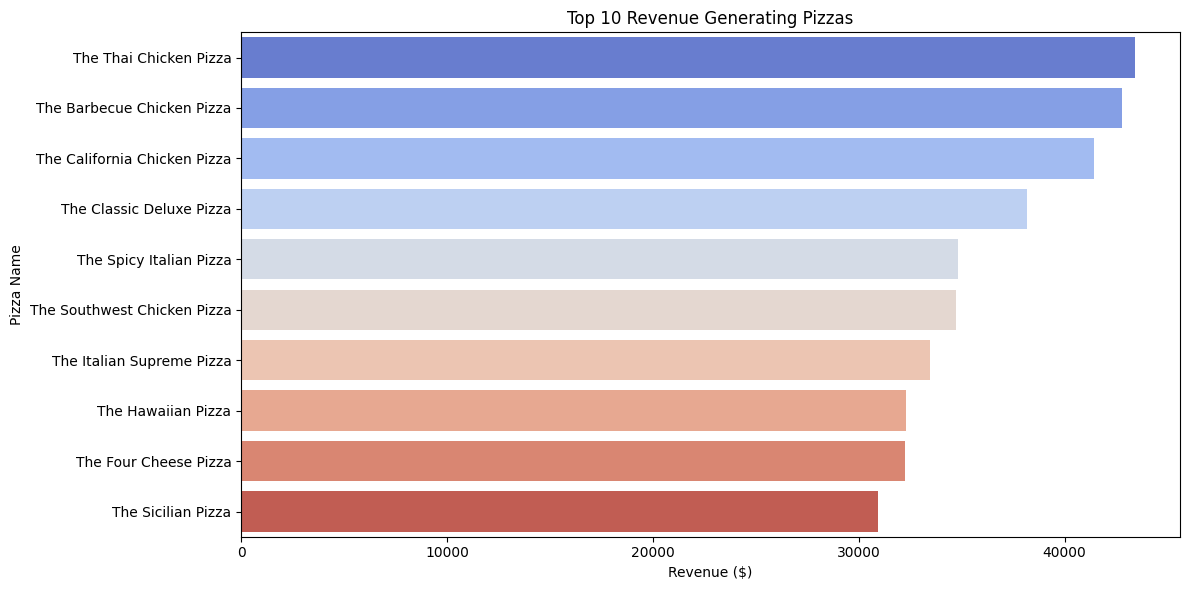

In [58]:
order_details['revenue'] = order_details['quantity'] * order_details['price']
revenue_pizza = order_details.groupby('name')['revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=revenue_pizza.values, y=revenue_pizza.index, palette='coolwarm')
plt.title('Top 10 Revenue Generating Pizzas')
plt.xlabel('Revenue ($)')
plt.ylabel('Pizza Name')
plt.tight_layout()
plt.show()

# Orders by Time of Day

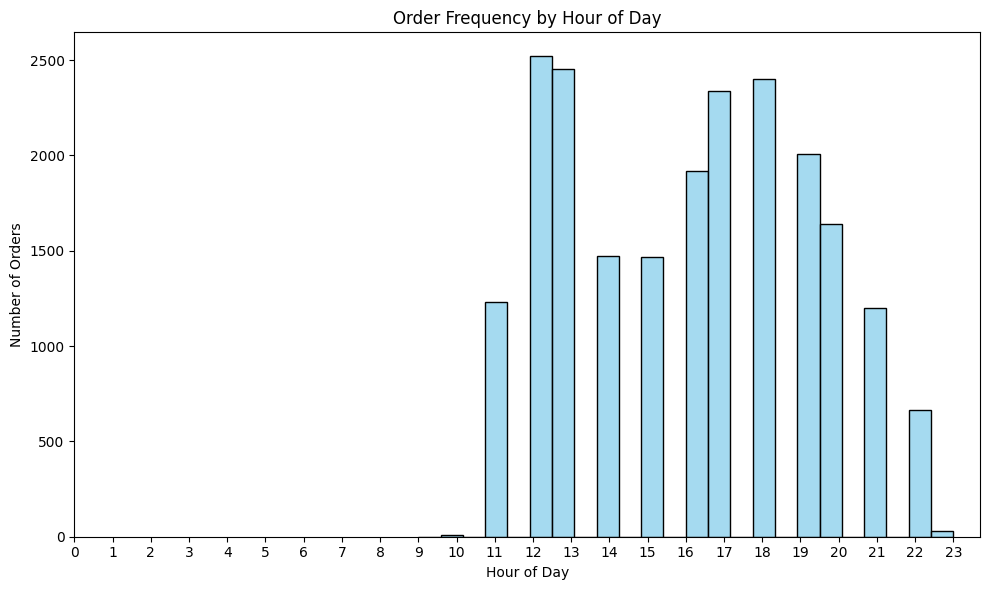

In [59]:
orders['time'] = pd.to_datetime(orders['time'], format='%H:%M:%S').dt.hour
plt.figure(figsize=(10, 6))
sns.histplot(orders['time'], bins=24, kde=False, color='skyblue')
plt.title('Order Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()